In [100]:
import os
import cv2
import numpy as np
from scipy.ndimage import center_of_mass
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import anderson, shapiro

In [101]:
def azimuthal_average(image_path):
    color_im = cv2.imread(image_path)
    im = cv2.cvtColor(color_im, cv2.COLOR_BGR2GRAY)

    com = center_of_mass(im)
    com = (int(com[0]), int(com[1]))
    size = min(com[0], com[1], im.shape[0] - com[0], im.shape[1] - com[1])
    cuted_im = im[com[0] - size:com[0] + size, com[1] - size:com[1] + size]

    def radial_profile(data, center):
        y, x = np.indices((data.shape))
        r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
        r = r.astype(int)

        tbin = np.bincount(r.ravel(), data.ravel())
        nr = np.bincount(r.ravel())
        radialprofile = tbin / nr
        return radialprofile

    center = (size, size)
    radialprofile = radial_profile(cuted_im, center)
    result = anderson(radialprofile[~np.isnan(radialprofile)], dist='norm')
    stat, p_val = shapiro(radialprofile[~np.isnan(radialprofile)])

    def gaussian(x, amplitude, mean, std_dev):
        return amplitude * np.exp(-(x - mean)**2 / (2 * std_dev**2))

    bins = np.arange(radialprofile.size)
    p0 = [np.max(radialprofile), np.mean(radialprofile), np.std(radialprofile)]
    params, _ = curve_fit(gaussian, bins[~np.isnan(radialprofile)], radialprofile[~np.isnan(radialprofile)], p0=p0)
    curve_fit_values = gaussian(bins, *params)

    gaussian_image = np.zeros((2*size, 2*size))
    for i in range(2*size):
        for j in range(2*size):
            r = np.sqrt((i - size)**2 + (j - size)**2)
            gaussian_image[i,j] = gaussian(r, *params)

    correlation = np.corrcoef(cuted_im.ravel(), gaussian_image.ravel())
    fig, axs = plt.subplots(1, 5, figsize=(25,5))

    axs[0].imshow(im, cmap='gray')
    axs[0].set_title('Original Image')

    axs[1].imshow(cuted_im, cmap='gray')
    axs[1].set_title('Centralised Image')

    axs[2].imshow(gaussian_image, cmap='gray')
    axs[2].set_title('Generated Gaussian Image')

    axs[3].plot(radialprofile)
    axs[3].set_title('Radial Profile')
    axs[3].set_xlabel('Radial Distance')
    axs[3].set_ylabel('Intensity')

    axs[4].plot(bins, radialprofile, label='Azimuthal Averaged Data')
    axs[4].plot(bins, curve_fit_values, label='Fitted Curve')
    axs[4].set_xlabel('Radial Distance')
    axs[4].set_ylabel('Intensity')
    axs[4].legend()
    axs[4].set_title('Azimuthal Averaging with Gaussian Fit')
    
    plt.tight_layout()
    plt.show()

    print('Anderson test statistic: ', result.statistic)
    print('Anderson critical values: ', result.critical_values)
    print('Anderson significance levels: ', result.significance_level)

    print('Shapiro test statistic: ', stat)
    print('Shapiro test p-value: ', p_val)

    print('Correlation:', correlation[0, 1])

In [119]:
def stack_images_vertically(image_dir):
    images = []
    min_height, min_width = np.inf, np.inf
    
    for file in os.listdir(image_dir):
        if file.endswith(('.png', '.jpg')):
            image_path = os.path.join(image_dir, file)
            img = cv2.imread(image_path)
            
            height, width, _ = img.shape
            min_height = min(min_height, height)
            min_width = min(min_width, width)
            
            images.append(img)

    resized_images = [cv2.resize(img, (min_width, min_height)) for img in images]
    stacked_image = np.vstack(resized_images)

    return stacked_image

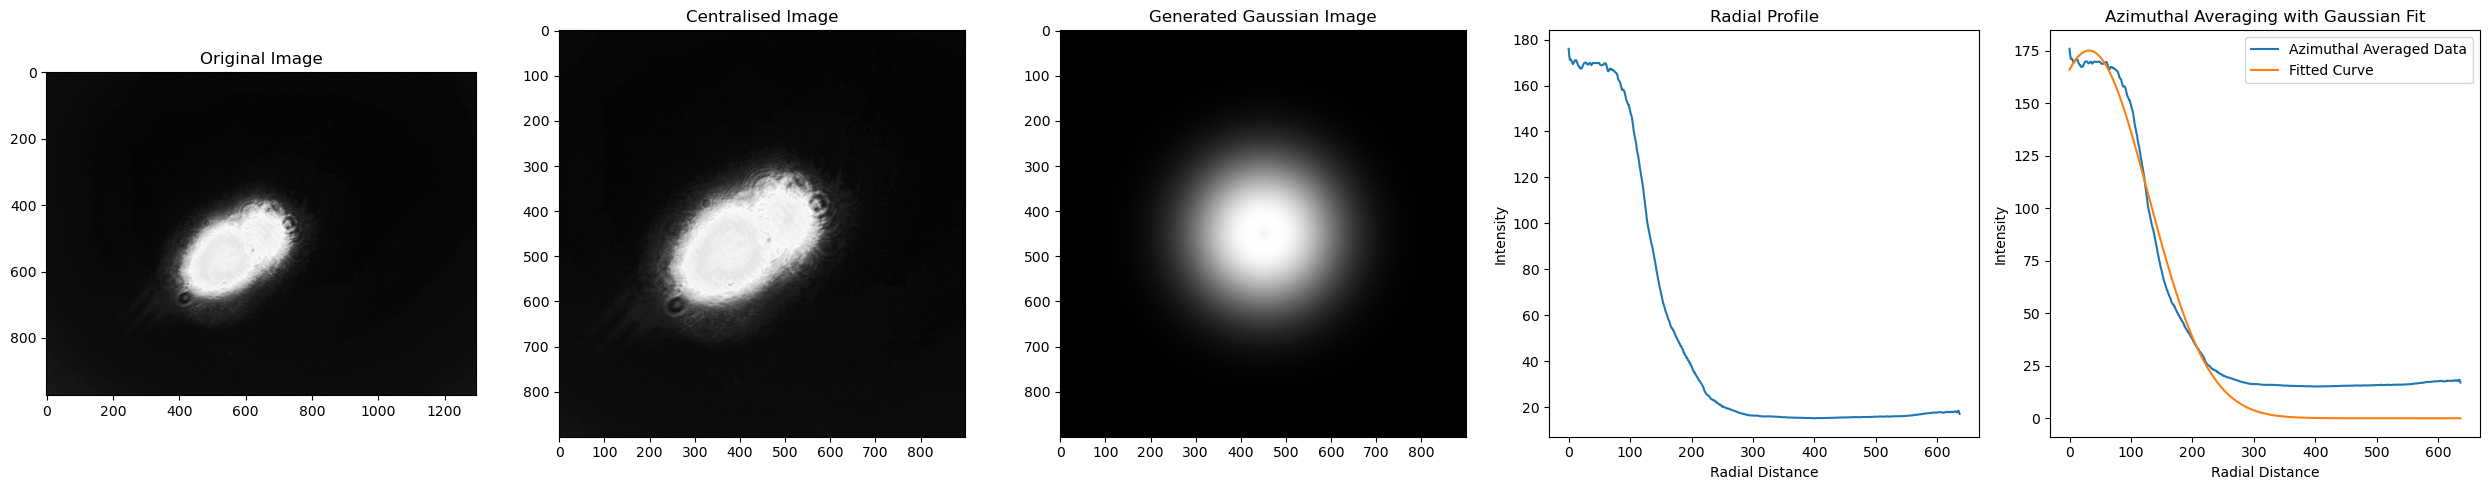

Anderson test statistic:  105.75138465723671
Anderson critical values:  [0.572 0.652 0.782 0.912 1.085]
Anderson significance levels:  [15.  10.   5.   2.5  1. ]
Shapiro test statistic:  0.6388231515884399
Shapiro test p-value:  1.6707725947406903e-34
Correlation: 0.8705874738367437


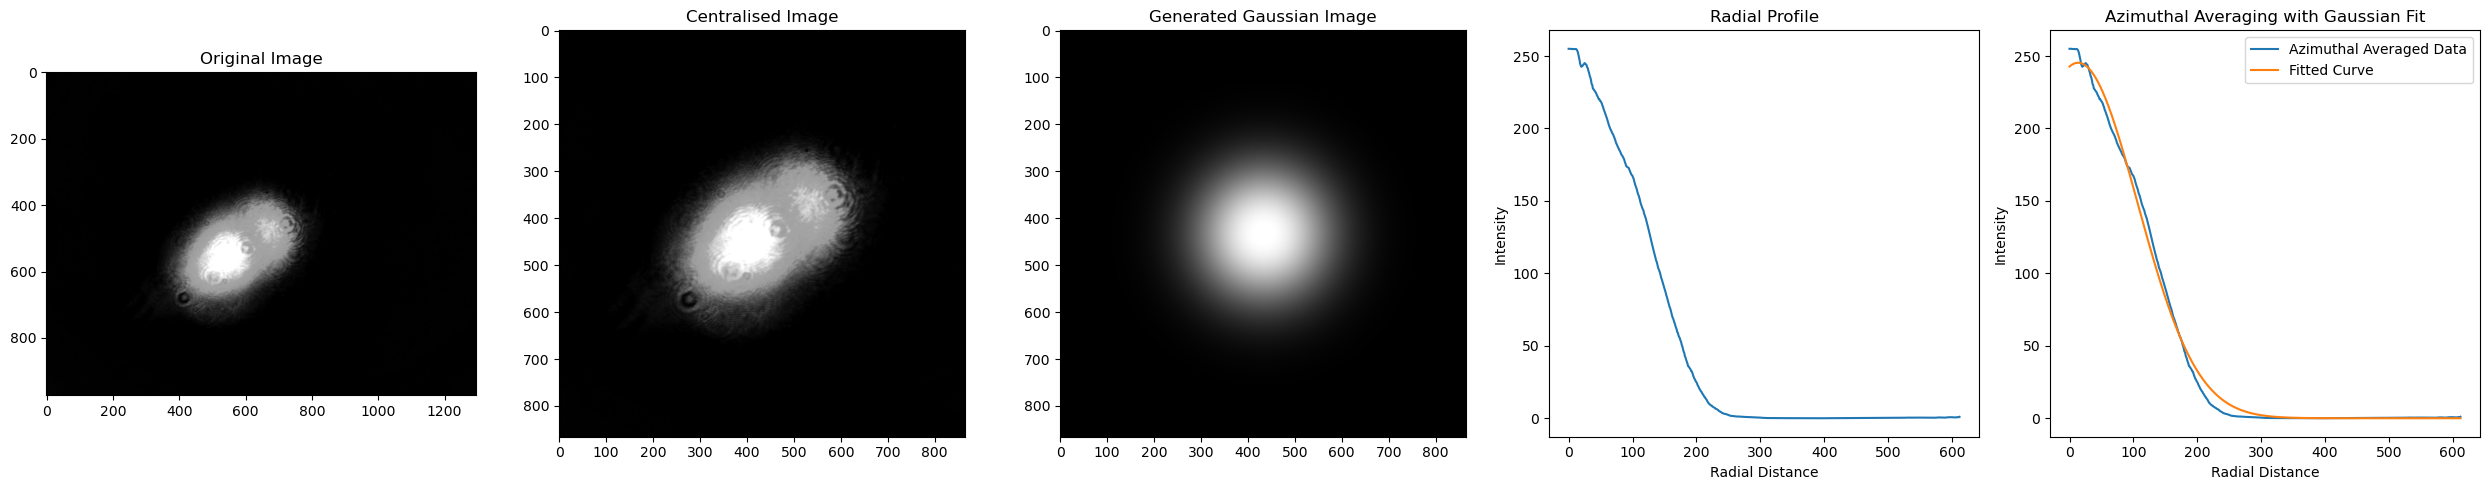

Anderson test statistic:  96.84748461090771
Anderson critical values:  [0.572 0.652 0.782 0.912 1.085]
Anderson significance levels:  [15.  10.   5.   2.5  1. ]
Shapiro test statistic:  0.6579030752182007
Shapiro test p-value:  2.959266987918784e-33
Correlation: 0.9327073359233674


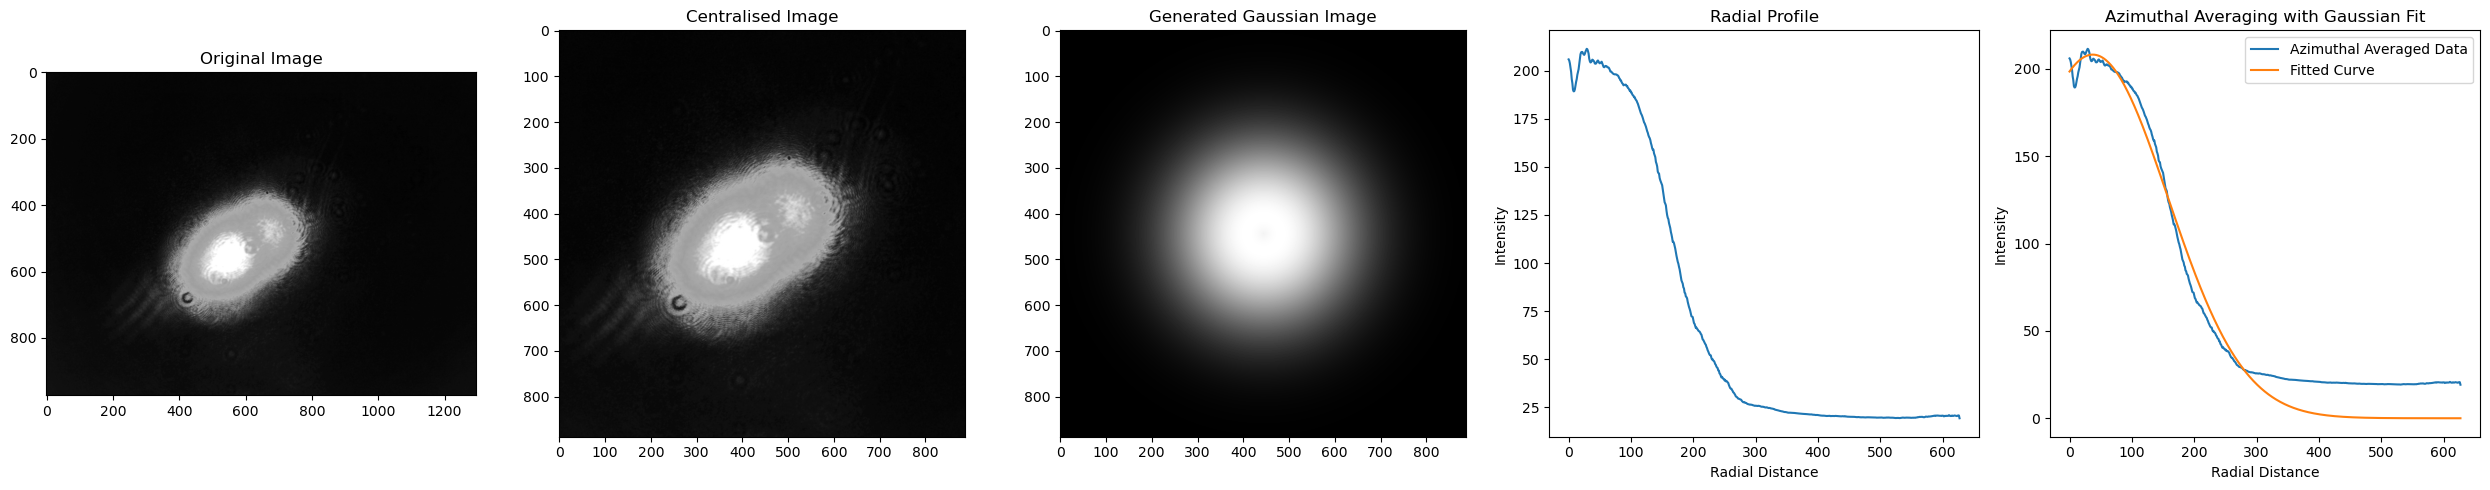

Anderson test statistic:  83.80594221345723
Anderson critical values:  [0.572 0.652 0.782 0.912 1.085]
Anderson significance levels:  [15.  10.   5.   2.5  1. ]
Shapiro test statistic:  0.7025832533836365
Shapiro test p-value:  7.729220364248507e-32
Correlation: 0.8991397291849231


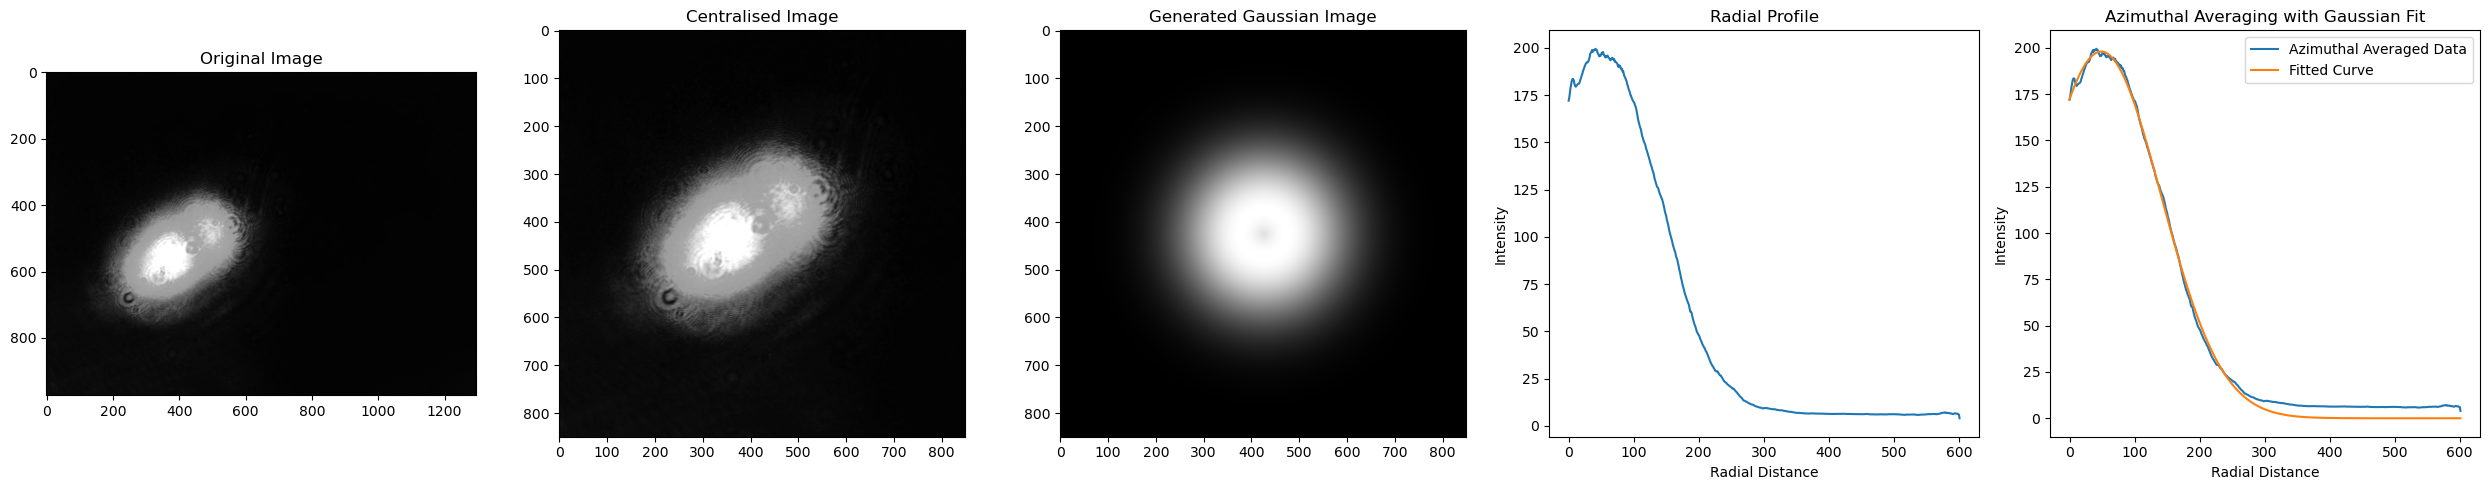

Anderson test statistic:  81.02717889297526
Anderson critical values:  [0.572 0.652 0.782 0.912 1.085]
Anderson significance levels:  [15.  10.   5.   2.5  1. ]
Shapiro test statistic:  0.699517011642456
Shapiro test p-value:  2.2068201969879756e-31
Correlation: 0.8863398845133696


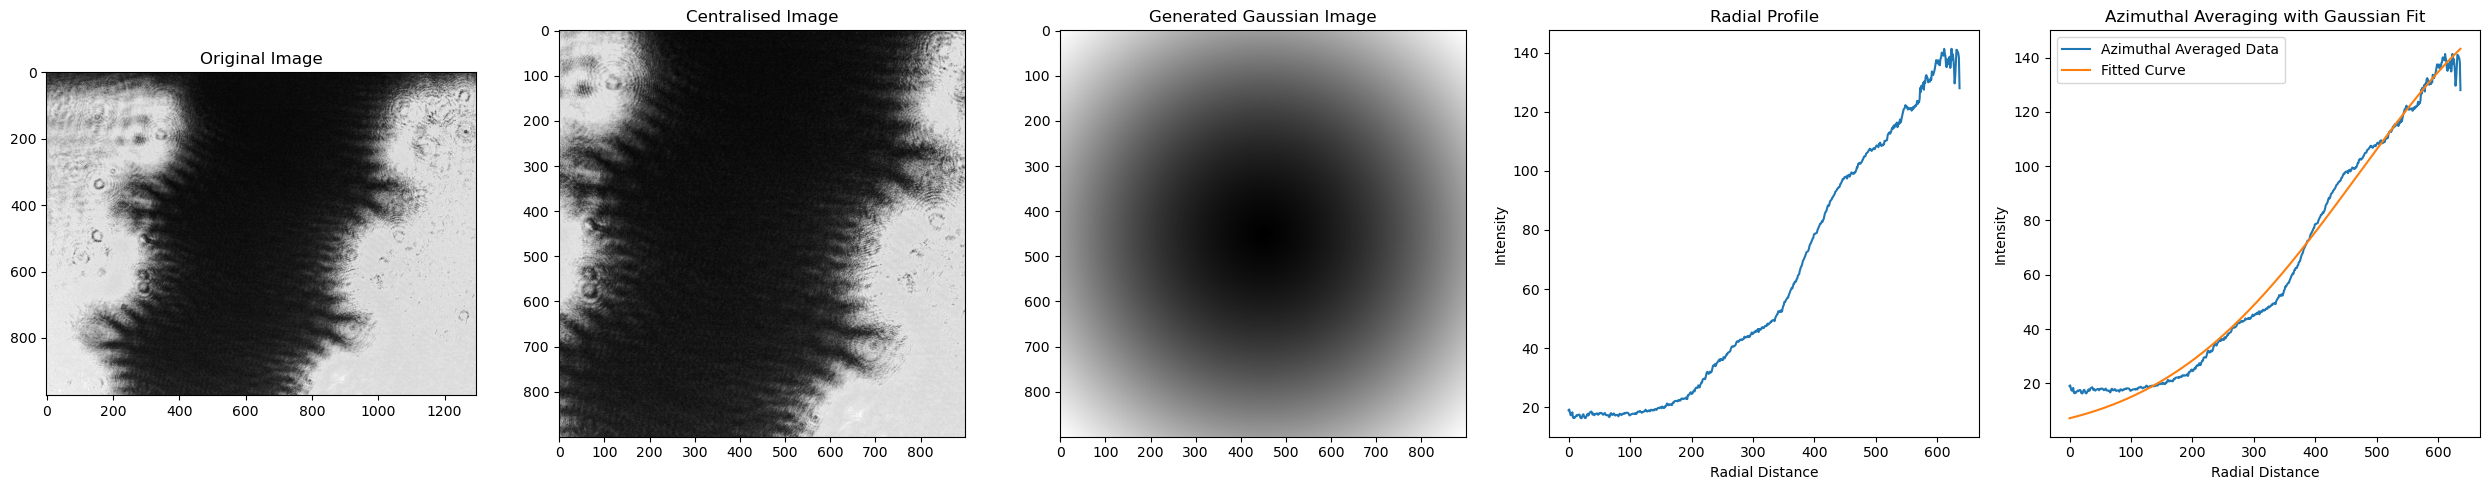

Anderson test statistic:  30.161637367671574
Anderson critical values:  [0.572 0.652 0.782 0.912 1.085]
Anderson significance levels:  [15.  10.   5.   2.5  1. ]
Shapiro test statistic:  0.8671446442604065
Shapiro test p-value:  8.027372840882115e-23
Correlation: 0.5158233772948762


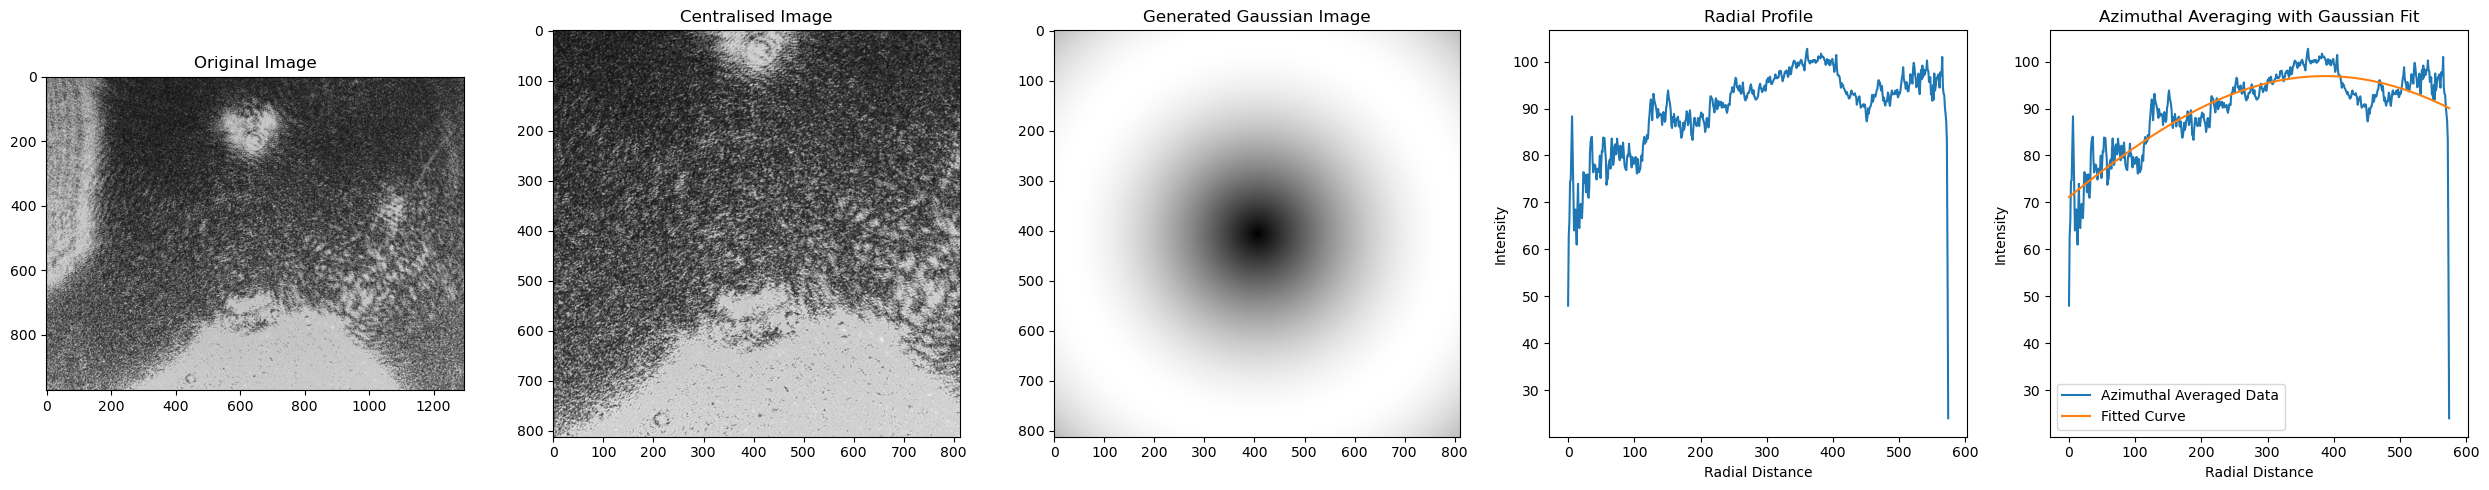

Anderson test statistic:  15.010113133929963
Anderson critical values:  [0.572 0.652 0.782 0.912 1.085]
Anderson significance levels:  [15.  10.   5.   2.5  1. ]
Shapiro test statistic:  0.877687394618988
Shapiro test p-value:  7.274301431593051e-21
Correlation: 0.09465993400674393


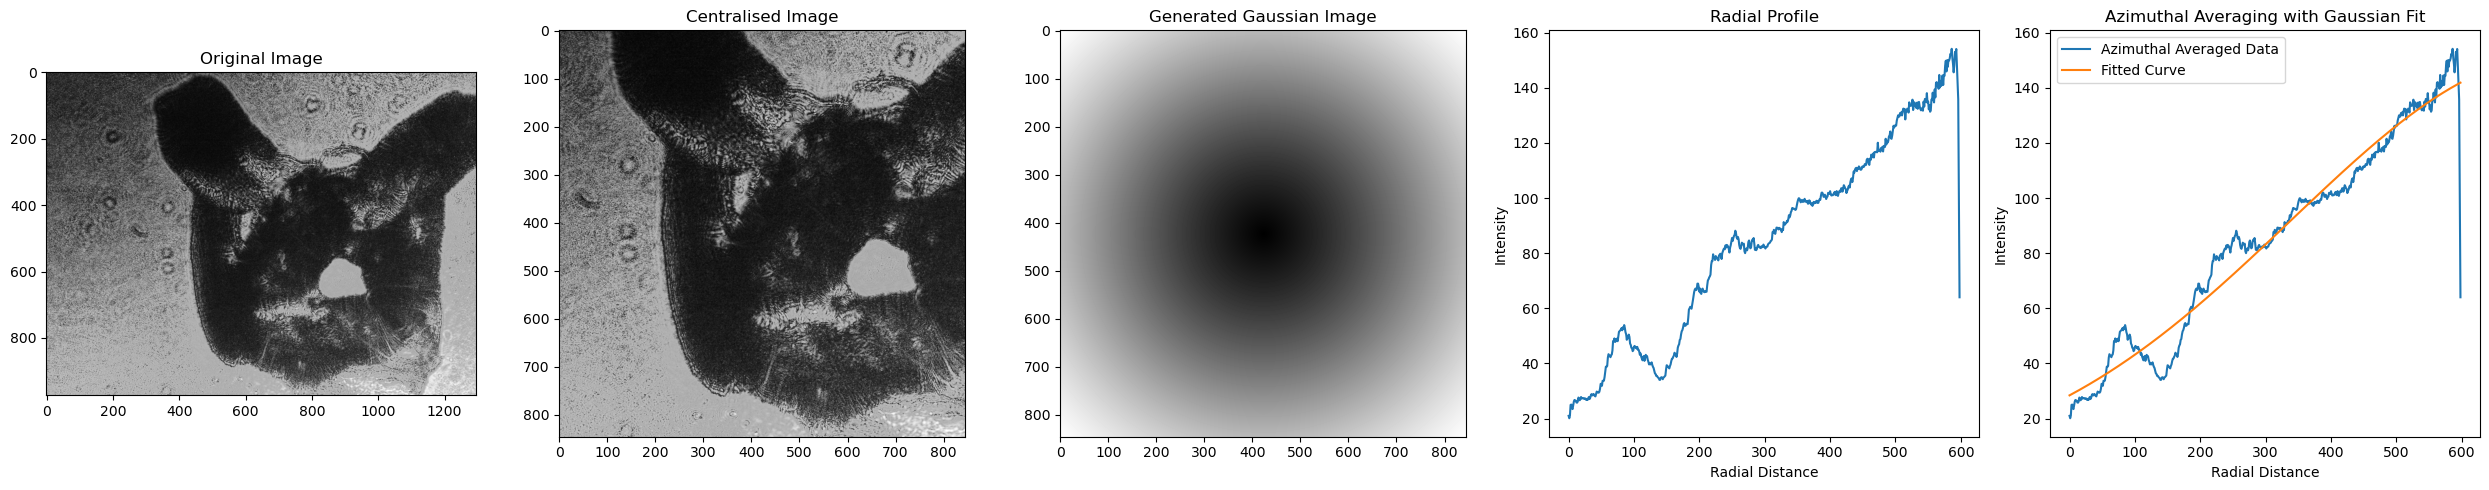

Anderson test statistic:  7.413862864081807
Anderson critical values:  [0.572 0.652 0.782 0.912 1.085]
Anderson significance levels:  [15.  10.   5.   2.5  1. ]
Shapiro test statistic:  0.9558345079421997
Shapiro test p-value:  2.0424415197312085e-12
Correlation: 0.4005888629438242


In [102]:
image_dir = 'test_repo/data_processing_images/gaussian_camera_images/'

for file in os.listdir(image_dir):
    if file.endswith(('.jpg', '.png')):
        image_path = os.path.join(image_dir, file)
        azimuthal_average(image_path)

In [120]:
image_dir = 'test_repo/data_processing_images/gaussian_camera_images/processed/'
stacked_img = stack_images_vertically(image_dir=image_dir)
cv2.imwrite('stacked_image.jpg', stacked_img)

True